In [1]:
import pandas as pd
import numpy as np
from   sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("./Credit_Card.csv")
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
0,3002,-0.302521,0.447474,-0.495757,-3.214799,2.705041,2.76244,0.593847,0.556451,0.697720,...,0.007343,0.250886,-0.331600,1.009952,0.233730,-0.824471,0.241305,-0.020359,1.0,0
1,1804,-0.448310,0.131642,1.056122,-1.876678,-0.138655,-0.77302,0.448099,-0.004013,-1.613489,...,-0.187811,-0.804053,0.178099,-0.057813,-0.128302,-0.793271,0.228775,0.085395,54.9,0


In [3]:
df.shape

(3492, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3492 entries, 0 to 3491
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    3492 non-null   int64  
 1   V1      3492 non-null   float64
 2   V2      3492 non-null   float64
 3   V3      3492 non-null   float64
 4   V4      3492 non-null   float64
 5   V5      3492 non-null   float64
 6   V6      3492 non-null   float64
 7   V7      3492 non-null   float64
 8   V8      3492 non-null   float64
 9   V9      3492 non-null   float64
 10  V10     3492 non-null   float64
 11  V11     3492 non-null   float64
 12  V12     3492 non-null   float64
 13  V13     3492 non-null   float64
 14  V14     3492 non-null   float64
 15  V15     3492 non-null   float64
 16  V16     3492 non-null   float64
 17  V17     3492 non-null   float64
 18  V18     3492 non-null   float64
 19  V19     3492 non-null   float64
 20  V20     3492 non-null   float64
 21  V21     3492 non-null   float64
 22  

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
count,3492.000000,3492.000000,3492.000000,3492.000000,3492.000000,3492.000000,3492.000000,3492.000000,3492.000000,3492.000000,...,3492.000000,3492.000000,3492.000000,3492.000000,3492.000000,3492.000000,3492.000000,3492.000000,3492.000000,3492.000000
mean,92476.211340,-0.618816,0.526295,-1.001873,0.618957,-0.444975,-0.230817,-0.774841,0.100752,-0.340065,...,0.104307,-0.017982,-0.010068,-0.008057,0.008271,0.012943,0.022353,0.021852,88.555295,0.140893
std,47859.071073,3.515831,2.475449,3.850920,2.312094,2.550466,1.427928,3.444725,2.690714,1.650078,...,1.577589,0.869375,0.723709,0.591698,0.557866,0.479424,0.623665,0.399267,227.509124,0.347961
min,0.000000,-30.552380,-17.826979,-31.103685,-4.505296,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.766638,-4.781606,-1.855355,-7.463188,-4.057438,0.000000,0.000000
25%,51733.750000,-1.179349,-0.477305,-1.463837,-0.727413,-0.855770,-0.931472,-0.780047,-0.222043,-0.933043,...,-0.224839,-0.568800,-0.181088,-0.370933,-0.319108,-0.305367,-0.072950,-0.054877,3.790000,0.000000
50%,84096.000000,-0.162176,0.195063,-0.126660,0.206201,-0.115646,-0.396419,-0.043970,0.037574,-0.145426,...,0.004218,-0.000412,-0.021574,0.031807,0.039885,-0.030117,0.006851,0.016160,19.000000,0.000000
75%,137300.500000,1.259120,1.078322,0.868484,1.176749,0.585707,0.285337,0.509458,0.401572,0.523802,...,0.248256,0.523501,0.152024,0.431281,0.364362,0.273267,0.146656,0.103646,82.700000,0.000000
max,172756.000000,2.418802,22.057729,3.708935,12.114672,11.095089,6.474115,7.724726,20.007208,6.754734,...,27.202839,8.361985,5.466230,3.448092,2.208209,2.745261,3.052358,9.876371,4350.000000,1.000000


In [6]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Fraud     0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.duplicated().sum()

19

In [9]:
df = df.drop_duplicates()

In [10]:
df.shape

(3473, 31)

In [11]:
num_cols = df.iloc[:,1:-1].select_dtypes(exclude='object').columns.values
num_cols

array(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype=object)

In [12]:
le = LabelEncoder()

In [13]:
for i in df.iloc[:,1:-1].columns:
    if df[i].dtype == 'object':  
        df[i] = le.fit_transform(df[i])

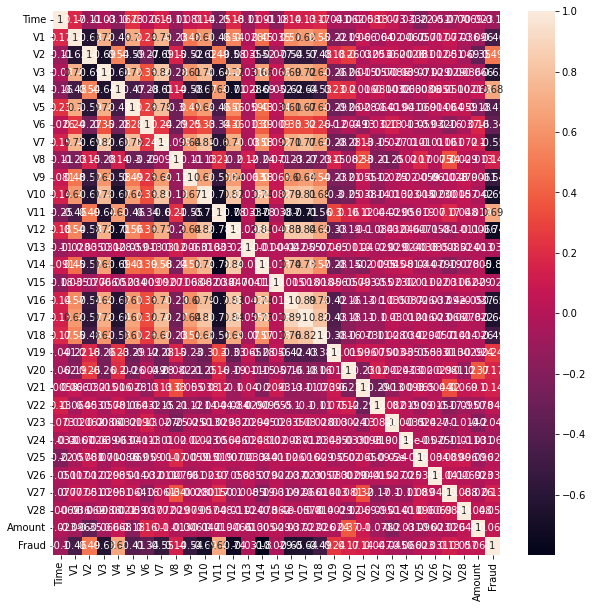

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [15]:
# Divide the data into “Attributes” and “labels”
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [16]:
y.value_counts()

0    3000
1     473
Name: Fraud, dtype: int64

In [17]:
le = LabelEncoder()
y = le.fit_transform(y)

In [18]:
# Split 80% of the data to the training set while 20% of the data to test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
sc = StandardScaler()
X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_test[num_cols] = sc.fit_transform(X_test[num_cols])

In [20]:
X_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
704,0.375060,-0.590961,0.695220,0.472752,-0.247283,1.461114,-0.101281,0.219111,1.027662,0.127913,...,0.018335,0.031146,0.624483,-0.116149,-0.401284,0.615963,-0.444279,0.165990,0.089664,0.219022
678,0.500103,0.295251,-0.122764,0.625631,0.515231,-0.544739,0.293087,-0.064194,0.274137,-0.475244,...,-0.127471,-0.304651,-0.998212,-0.076216,-0.559282,1.178947,-0.686056,0.147052,0.293076,-0.388975
980,0.508451,0.822216,-1.059430,2.018853,0.571793,-0.744325,-0.141217,0.087092,-1.310211,-0.798141,...,0.199292,0.030464,-0.904262,-0.023048,-1.600672,0.627634,0.132622,0.703455,0.676648,-0.372442
1571,-0.161882,0.597820,0.036764,0.932967,-0.579479,0.127980,-0.169844,-0.261948,-0.480158,-0.860251,...,0.246693,0.756526,0.255582,0.080399,0.823451,-0.284295,-0.556711,0.821036,0.167153,0.318682
3397,-0.028158,-0.238004,1.065728,-1.064266,-0.178343,0.295925,0.059859,0.049173,-0.257929,0.377692,...,0.234505,0.263060,1.689740,-0.331880,0.387350,0.427073,-0.310450,0.243033,-0.296328,-0.384852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,0.491344,-0.140749,0.654868,0.938104,-0.155446,0.312201,0.046035,0.033616,0.405809,0.412211,...,-0.291400,-0.191029,-0.567847,0.133051,0.586375,0.552230,-0.209590,0.055699,0.055418,-0.370984
3003,-1.177938,0.313000,-1.107606,1.100099,-1.026914,-1.345822,-1.587947,0.875362,-1.659878,-2.754355,...,0.685781,0.797450,-0.001896,0.710626,-0.290748,0.805333,0.582984,2.102583,-0.369636,-0.341873
536,-0.074542,-0.620479,0.767425,-1.368880,-0.394538,0.161374,0.223555,-0.008743,-1.222410,0.461939,...,0.036097,0.032198,0.211774,0.169201,-0.183175,0.848949,-0.501963,-0.023738,0.141529,0.431461
1052,0.712381,-0.076685,0.270268,1.301440,0.162243,0.521260,0.053861,0.021896,-0.026134,0.755648,...,-0.364936,0.066903,0.510085,0.316618,1.112077,-0.402374,-0.089246,0.003100,-0.099529,-0.389975


In [21]:
# Create a Linear Regression model and fit it
lr =LogisticRegression()
model = lr.fit(X_train,y_train)

In [22]:
# Predicting the data
y_predict=model.predict(X_test)
y_predict

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict,y_test)

0.9755395683453237

In [24]:
DT=DecisionTreeClassifier()
dt=DT.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
dt_acc_score=accuracy_score(y_test,dt_pred)*100
(dt_acc_score)

96.83453237410072

In [25]:
RF=RandomForestClassifier()
rf=RF.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
rf_acc_score=accuracy_score(y_test,rf_pred)*100
(rf_acc_score)

97.98561151079137